In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the data
df_human = pd.read_table('human_data.txt')
df_human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
df_human.shape

(4380, 2)

In [4]:
df_chimp = pd.read_table('chimp_data.txt')
df_chimp.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [5]:
df_chimp.shape

(1682, 2)

In [6]:
df_dog = pd.read_table('dog_data.txt')
df_dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [7]:
df_dog.shape

(820, 2)

#### Will be treating DNA sequence as 'language' , using *k-mer counting*

In [8]:
# create a function to collect or generate the possible k-mers from the sequence or string
def getKemers(sequence, size = 6):     # Lets use 6 as adefault size for k-mers
    return [sequence[i:i+size].lower() for i in range(len(sequence)-size+1)]

In [9]:
# add the k-mers to the dataframe
df_human['words'] = df_human.apply(lambda x: getKemers(x['sequence']), axis=1)

In [10]:
df_human.head()

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [11]:
df_human.drop('sequence', axis=1,inplace=True)

In [12]:
df_human.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [13]:
# do the same for chimp and dog data
df_chimp['words'] = df_chimp.apply(lambda x: getKemers(x['sequence']), axis=1)
df_chimp.drop('sequence', axis=1, inplace=True)

df_dog['words'] = df_dog.apply(lambda x: getKemers(x['sequence']), axis=1)
df_dog.drop('sequence', axis=1, inplace=True)

In [14]:
df_chimp.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [15]:
df_dog.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [16]:
df_human['words'][0]

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [17]:
print(' '.join(df_human['words'][0]))

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [18]:
# join words - jwords
df_human['jwords'] = df_human['words'].apply(lambda x: ' '.join(x))

In [19]:
df_human.head()

,class,words,jwords
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...",atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...",atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...",atgcaa tgcaac gcaaca caacag aacagc acagca cagc...


In [20]:
# Do the same for dog and chimp dataset
df_chimp['jwords'] = df_chimp['words'].apply(lambda x: ' '.join(x))
df_dog['jwords'] = df_dog['words'].apply(lambda x: ' '.join(x))

In [21]:
df_chimp.head()

,class,words,jwords
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...",atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...",atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgc...
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc...",atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgc...
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg...",atgggc tgggca gggcag ggcagc gcagcg cagcgc agcg...


In [22]:
df_dog.head()

,class,words,jwords
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc...",atgcca tgccac gccaca ccacag cacagc acagct cagc...
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...",atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac...",atggaa tggaaa ggaaac gaaaca aaacac aacacc acac...
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta...",atgtgc tgtgca gtgcac tgcact gcacta cactaa acta...
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc...",atgagc tgagcc gagccg agccgg gccggc ccggca cggc...


In [23]:
print(df_human['jwords'][0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

#### These are just texts, need to convert them into vectors
#### Use bag of words method i.e use countvectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cvt = CountVectorizer(ngram_range=(4,4))  # came to this value(of ngram_range) by trying out different values again and again

In [26]:
human_data = cvt.fit_transform(df_human['jwords'])

In [27]:
human_data.shape

(4380, 232414)

In [28]:
chimp_data = cvt.transform(df_chimp['jwords'])
dog_data = cvt.transform(df_dog['jwords'])

In [29]:
print(chimp_data.shape)
print(dog_data.shape)

(1682, 232414)
(820, 232414)


In [30]:
# Lets do model building for human_data first

In [31]:
df_human['class'].value_counts()

6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: class, dtype: int64

In [32]:
df_human['class'].value_counts().sort_index()

0     531
1     534
2     349
3     672
4     711
5     240
6    1343
Name: class, dtype: int64

Text(0, 0.5, 'Count')

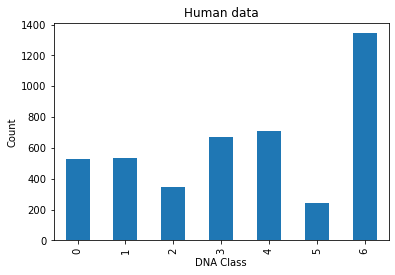

In [33]:
df_human['class'].value_counts().sort_index().plot.bar()
plt.title('Human data')
plt.xlabel('DNA Class')
plt.ylabel('Count')

##### The data is almost balanced and this is multiple class classification .
##### So multinomial naive bayes classifier should be probable choice

In [34]:
# First split the data
from sklearn.model_selection import train_test_split

In [35]:
X = human_data
y = df_human['class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(3504, 232414)

In [38]:
X_test.shape

(876, 232414)

In [39]:
# import the classifier
from sklearn.naive_bayes import MultinomialNB

In [40]:
clf = MultinomialNB()

In [41]:
clf.fit(X_train,y_train)

MultinomialNB()

In [42]:
h_predictions1 = clf.predict(X_test)

In [43]:
h_predictions1

array([2, 5, 4, 6, 3, 6, 4, 2, 6, 6, 0, 6, 0, 6, 6, 6, 6, 1, 4, 1, 6, 3,
       4, 4, 4, 6, 0, 6, 6, 6, 2, 6, 3, 6, 3, 0, 0, 6, 3, 4, 3, 0, 0, 5,
       3, 0, 6, 6, 1, 2, 1, 3, 0, 5, 0, 5, 2, 6, 4, 1, 5, 1, 4, 4, 4, 4,
       4, 3, 4, 2, 2, 3, 4, 5, 0, 3, 6, 1, 6, 1, 4, 1, 6, 3, 1, 6, 6, 4,
       1, 2, 4, 3, 4, 3, 1, 1, 6, 6, 1, 1, 5, 1, 6, 3, 6, 4, 4, 1, 2, 0,
       6, 3, 5, 4, 6, 6, 5, 6, 6, 6, 3, 6, 0, 4, 4, 1, 2, 0, 4, 6, 5, 2,
       5, 6, 1, 2, 4, 4, 6, 1, 3, 2, 3, 5, 6, 6, 1, 5, 6, 4, 3, 6, 6, 6,
       6, 2, 3, 6, 0, 6, 6, 3, 1, 0, 5, 2, 4, 2, 1, 4, 5, 4, 6, 6, 6, 6,
       6, 3, 4, 4, 2, 2, 1, 1, 2, 6, 6, 6, 6, 0, 4, 0, 4, 2, 1, 2, 3, 0,
       6, 4, 6, 1, 2, 1, 4, 4, 3, 5, 6, 6, 6, 0, 4, 1, 5, 1, 3, 3, 5, 5,
       6, 0, 0, 6, 3, 0, 0, 6, 5, 2, 0, 1, 5, 3, 1, 1, 6, 6, 1, 3, 2, 4,
       3, 6, 6, 3, 4, 6, 4, 4, 0, 3, 4, 3, 6, 1, 4, 6, 6, 6, 6, 0, 0, 6,
       6, 6, 6, 4, 4, 3, 3, 1, 4, 6, 4, 4, 4, 2, 3, 2, 6, 3, 3, 6, 2, 6,
       6, 1, 1, 5, 0, 5, 3, 1, 3, 6, 2, 2, 4, 1, 6,

In [44]:
# check the performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
print('Confusion Matrix')
print(confusion_matrix(y_test,h_predictions1))
print('---------------------------------')
print('Classification Report')
print(classification_report(y_test,h_predictions1))
print('---------------------------------')
print('Accuracy')
print(accuracy_score(y_test,h_predictions1))

Confusion Matrix
[[ 98   0   0   0   1   2   1]
 [  0 104   0   0   0   0   2]
 [  0   0  78   0   0   0   0]
 [  0   0   0 124   1   0   0]
 [  0   0   0   0 146   0   3]
 [  0   0   0   0   0  51   0]
 [  0   0   0   1   2   1 261]]
---------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.97      0.98      0.98       149
           5       0.94      1.00      0.97        51
           6       0.98      0.98      0.98       265

    accuracy                           0.98       876
   macro avg       0.98      0.99      0.98       876
weighted avg       0.98      0.98      0.98       876

---------------------------------
Accuracy
0.9840182648401826


#### Default parameters give a nice accuracy but lets try hyperparameter tuning using Gridsearch

In [46]:
hyper_param = {'alpha':[0.0001,0.001,0.01,0.1,0.5,1,2]}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
gds = GridSearchCV(estimator=MultinomialNB(), param_grid=hyper_param)

In [49]:
gds.fit(X_train,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2]})

In [50]:
gds.best_params_

{'alpha': 0.5}

In [51]:
gds.best_score_

0.9629007540248624

In [52]:
gds.cv_results_

{'mean_fit_time': array([0.14551454, 0.1439024 , 0.14230957, 0.13911209, 0.14230328,
        0.14390874, 0.13751502]),
 'std_fit_time': array([7.84292849e-03, 5.05754397e-03, 3.18474895e-03, 3.89760533e-03,
        3.19693123e-03, 1.42030252e-05, 9.32810255e-03]),
 'mean_score_time': array([0.02879143, 0.03036819, 0.02558694, 0.02558508, 0.02557893,
        0.02877631, 0.0245894 ]),
 'std_score_time': array([0.0039218 , 0.00319037, 0.00318024, 0.00319557, 0.00320047,
        0.00390878, 0.00120635]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 2}],
 'split0_test_score': array([0.95292439, 0.95863053, 0.96291013, 0.97289586, 0.9700428 ,
        0.96861626, 0.96718973]),
 'split1_test_score': array([0.931526

In [53]:
df = pd.DataFrame(gds.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.145515,0.007843,0.028791,0.003922,0.0001,{'alpha': 0.0001},0.952924,0.931526,0.921541,0.944365,0.932857,0.936643,0.010893,7
1,0.143902,0.005058,0.030368,0.003190,0.001,{'alpha': 0.001},0.958631,0.932953,0.928673,0.950071,0.938571,0.941780,0.011070,6
2,0.142310,0.003185,0.025587,0.003180,0.01,{'alpha': 0.01},0.962910,0.940086,0.934379,0.954351,0.942857,0.946917,0.010309,5
3,0.139112,0.003898,0.025585,0.003196,0.1,{'alpha': 0.1},0.972896,0.950071,0.944365,0.964337,0.964286,0.959191,0.010423,4
4,0.142303,0.003197,0.025579,0.003200,0.5,{'alpha': 0.5},0.970043,0.951498,0.960057,0.965763,0.967143,0.962901,0.006562,1
5,0.143909,0.000014,0.028776,0.003909,1,{'alpha': 1},0.968616,0.948645,0.952924,0.964337,0.967143,0.960333,0.008031,2
6,0.137515,0.009328,0.024589,0.001206,2,{'alpha': 2},0.967190,0.947218,0.951498,0.967190,0.964286,0.959476,0.008438,3


In [54]:
gds_predictions = gds.predict(X_test)

In [55]:
print('Confusion Matrix')
print(confusion_matrix(y_test,gds_predictions))
print('---------------------------------')
print('Classification Report')
print(classification_report(y_test,gds_predictions))
print('---------------------------------')
print('Accuracy')
print(accuracy_score(y_test,gds_predictions))

Confusion Matrix
[[100   0   0   0   2   0   0]
 [  0 104   0   0   0   0   2]
 [  0   0  78   0   0   0   0]
 [  0   0   0 124   1   0   0]
 [  0   0   0   0 146   0   3]
 [  0   0   0   0   0  51   0]
 [  1   0   0   1   2   0 261]]
---------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.97      0.98      0.97       149
           5       1.00      1.00      1.00        51
           6       0.98      0.98      0.98       265

    accuracy                           0.99       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.99      0.99      0.99       876

---------------------------------
Accuracy
0.9863013698630136


In [56]:
# Looks like alpha = 0.5 is giving the best results for human data

Text(0, 0.5, 'Count')

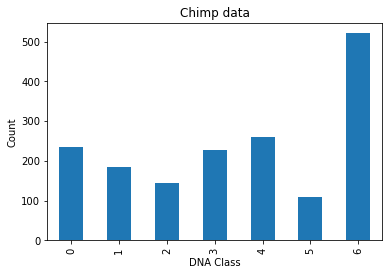

In [57]:
df_chimp['class'].value_counts().sort_index().plot.bar()
plt.title('Chimp data')
plt.xlabel('DNA Class')
plt.ylabel('Count')

In [58]:
c_predictions = gds.predict(chimp_data)

In [59]:
print('Confusion Matrix')
print(confusion_matrix(df_chimp['class'],c_predictions))
print('---------------------------------')
print('Classification Report')
print(classification_report(df_chimp['class'],c_predictions))
print('---------------------------------')
print('Accuracy')
print(accuracy_score(df_chimp['class'],c_predictions))

Confusion Matrix
[[233   0   0   0   1   0   0]
 [  0 184   0   0   0   0   1]
 [  0   0 144   0   0   0   0]
 [  0   0   0 227   1   0   0]
 [  0   0   0   0 260   0   1]
 [  0   0   0   0   0 109   0]
 [  0   0   0   0   2   0 519]]
---------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      0.99      1.00       185
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       228
           4       0.98      1.00      0.99       261
           5       1.00      1.00      1.00       109
           6       1.00      1.00      1.00       521

    accuracy                           1.00      1682
   macro avg       1.00      1.00      1.00      1682
weighted avg       1.00      1.00      1.00      1682

---------------------------------
Accuracy
0.9964328180737217


In [60]:
# The model gives very accurate results on chimp data , well chimps and humans are actually related genetically

Text(0, 0.5, 'Count')

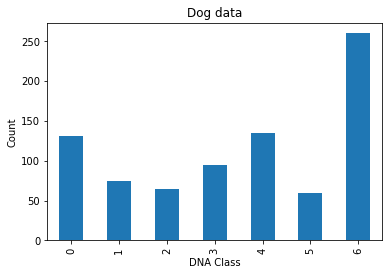

In [61]:
df_dog['class'].value_counts().sort_index().plot.bar()
plt.title('Dog data')
plt.xlabel('DNA Class')
plt.ylabel('Count')

In [62]:
d_predictions = gds.predict(dog_data)

In [63]:
print('Confusion Matrix')
print(confusion_matrix(df_dog['class'],d_predictions))
print('---------------------------------')
print('Classification Report')
print(classification_report(df_dog['class'],d_predictions))
print('---------------------------------')
print('Accuracy')
print(accuracy_score(df_dog['class'],d_predictions))

Confusion Matrix
[[127   0   0   0   3   0   1]
 [  1  62   0   0   4   0   8]
 [  0   0  58   0   4   0   2]
 [  0   0   0  85   6   1   3]
 [  1   0   0   1 131   1   1]
 [  1   0   0   0   1  58   0]
 [  0   0   0   1   2   0 257]]
---------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       131
           1       1.00      0.83      0.91        75
           2       1.00      0.91      0.95        64
           3       0.98      0.89      0.93        95
           4       0.87      0.97      0.92       135
           5       0.97      0.97      0.97        60
           6       0.94      0.99      0.97       260

    accuracy                           0.95       820
   macro avg       0.96      0.93      0.94       820
weighted avg       0.95      0.95      0.95       820

---------------------------------
Accuracy
0.948780487804878


In [64]:
# Model did not perform well on dog data , unlike chimps humans are not very related to dogs genetically.